# Uber Data Analysis

#### In this project, we will answer the following question:


1. What is the month we have the most clients?
2. What is the day we have the most clients?
3. What is the hour we have the most clients?
4. What is the category that brings us the most clients?
5. What is the most frequent trip's purpose?
6. What is the most frequent starting place for our trips?
7. What is the most frequent ending place for our trips?
8. What is the mean of miles for each trip purpose?
9. What is the mean of miles for each trip category?
10. What is the mean of miles for each ending trip point?
11. What is the mean of miles for each starting trip point?

## Table of content

> **-Data Assessing**


> **-Data Clean**

> **-Data Analysis**


In [1]:
# Constants
DATAPATH = "UBER_DATA_ANALYSIS.csv"

In [2]:
#load packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
#read data
row_data = pd.read_csv(DATAPATH)
df = row_data.copy()
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Assessing Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


> **I found two problems with the data:**  
>> 1. The columns of Date Time are in a wrong format 
>> 2. There are many missing values in the PURPOSE Column   
>> 3. The START_DATE* column needs to be separated into the month, day, and hour columns for easier analysis
>> 4.  We need to calculate the Trip Duration 

# Data Clean 

In [6]:
# We will begin by replacing the missing values of the purpose column with the word unknown   
df['PURPOSE*'].fillna("Unknown", inplace = True)

In [7]:
# Correct the format of the DateTime columns
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [8]:
# Separating the START_DATE* column into the month, day, and hour columns 
df['Start_Month'] = df['START_DATE*'].dt.month_name()
df['Start_Day'] = df['START_DATE*'].dt.day_name()
df['Start_Hour'] = df['START_DATE*'].dt.hour

In [9]:
# calculating the Trip Duration
df["Trip_Duration"] = df['END_DATE*'] - df['START_DATE*']

In [10]:
# Dropping the useless columns
df.drop({'START_DATE*', 'END_DATE*'}, axis = 1)

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Month,Start_Day,Start_Hour,Trip_Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21,00:06:00
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown,January,Saturday,1,00:12:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20,00:13:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17,00:14:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14,01:07:00
...,...,...,...,...,...,...,...,...,...
1150,Business,Kar?chi,Kar?chi,0.7,Meeting,December,Saturday,1,00:07:00
1151,Business,Kar?chi,Unknown Location,3.9,Temporary Site,December,Saturday,13,00:18:00
1152,Business,Unknown Location,Unknown Location,16.2,Meeting,December,Saturday,15,00:35:00
1153,Business,Katunayake,Gampaha,6.4,Temporary Site,December,Saturday,21,00:18:00


# Data Analysis Part

### General Look

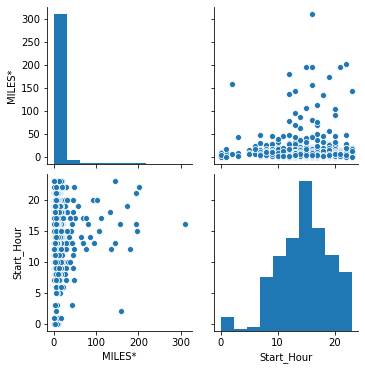

In [11]:
sns.pairplot(df)

### What is the month we have the most clients?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

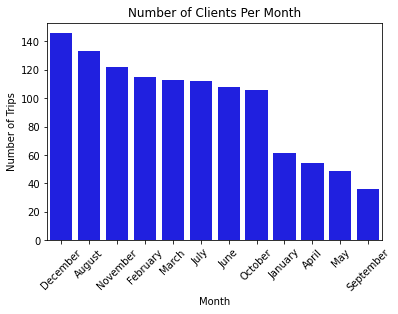

In [12]:
sns.countplot(df['Start_Month'], order = df['Start_Month'].value_counts().index, color = "blue")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Month")
plt.xticks(rotation=45)

### What is the day we have the most clients?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

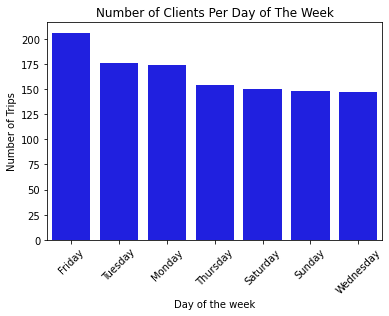

In [13]:
sns.countplot(df['Start_Day'], order = df['Start_Day'].value_counts().index, color = "blue")
plt.xlabel("Day of the week")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Day of The Week")
plt.xticks(rotation=45)

### What is the hour we have the most clients?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

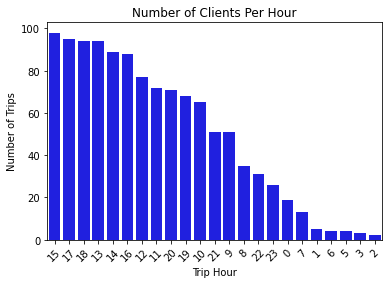

In [14]:
sns.countplot(df['Start_Hour'], order = df['Start_Hour'].value_counts().index, color = "blue")
plt.xlabel("Trip Hour")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Hour")
plt.xticks(rotation=45)

### What is the category that brings us the most clients?

Text(0.5, 1.0, 'Number of Clients Per Trip Category')

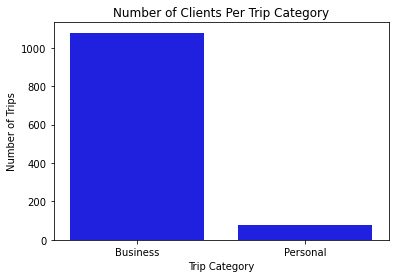

In [15]:
sns.countplot(df['CATEGORY*'], order = df['CATEGORY*'].value_counts().index, color = "blue")
plt.xlabel("Trip Category")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Trip Category")

### What is the most frequent trip's purpose?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

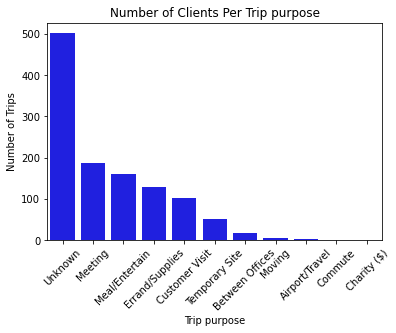

In [16]:
sns.countplot(df['PURPOSE*'], order = df['PURPOSE*'].value_counts().index, color = "blue")
plt.xlabel("Trip purpose")
plt.ylabel("Number of Trips")
plt.title("Number of Clients Per Trip purpose")
plt.xticks(rotation=45)

### What is the most frequent starting place for our trips?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

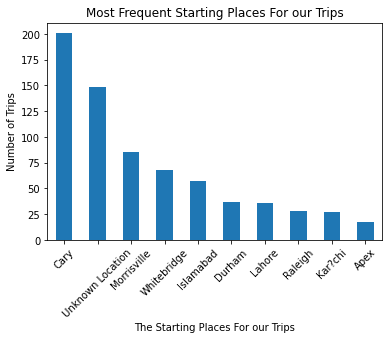

In [17]:
df['START*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("The Starting Places For our Trips")
plt.ylabel("Number of Trips")
plt.title("Most Frequent Starting Places For our Trips")
plt.xticks(rotation=45)

### What is the most frequent ending place for our trips?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

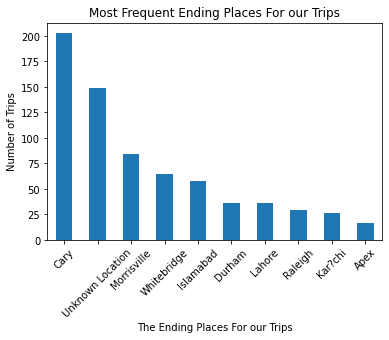

In [18]:
df['STOP*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("The Ending Places For our Trips")
plt.ylabel("Number of Trips")
plt.title("Most Frequent Ending Places For our Trips")
plt.xticks(rotation=45)

### What is the mean of miles for each trip purpose?

Text(0.5, 1.0, 'The Mean of Miles for Each Purpose')

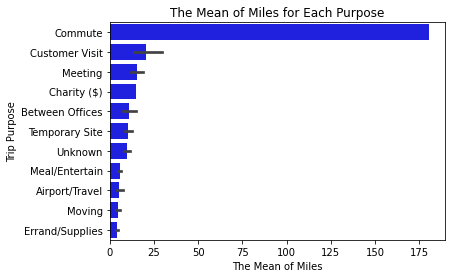

In [19]:
sns.barplot(x =df['MILES*'] , y= df['PURPOSE*'],
            order= df.groupby('PURPOSE*')['MILES*'].mean().sort_values(ascending=False).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trip Purpose")
plt.title("The Mean of Miles for Each Purpose")

### What is the mean of miles for each trip category?

Text(0.5, 1.0, 'The Mean of Miles for Each Category')

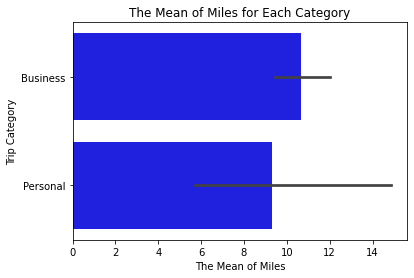

In [20]:
sns.barplot(x =df['MILES*'] , y= df['CATEGORY*'],
            order= df.groupby('CATEGORY*')['MILES*'].mean().sort_values(ascending=False).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trip Category")
plt.title("The Mean of Miles for Each Category")

### What is the mean of miles for each ending trip point?

Text(0.5, 1.0, 'The Mean of Miles for Each Ending Point')

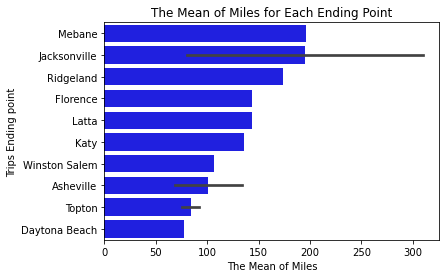

In [21]:
sns.barplot(x =df['MILES*'] , y= df['STOP*'],
            order= df.groupby('STOP*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trips Ending point")
plt.title("The Mean of Miles for Each Ending Point")

### What is the mean of miles for each starting trip point?

Text(0.5, 1.0, 'The Mean of Miles for Each Starting Point')

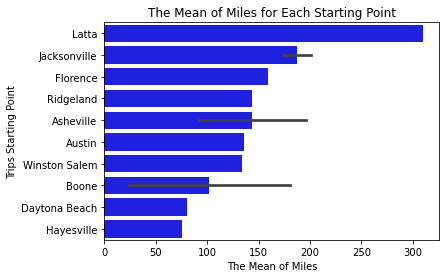

In [22]:
sns.barplot(x =df['MILES*'] , y= df['START*'],
            order= df.groupby('START*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trips Starting Point")
plt.title("The Mean of Miles for Each Starting Point")